In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import rankdata
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind

sns.set(style="whitegrid")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# thirdly will be working on proteomics dataset

#Step 1: Loading the data provided
input_path = "/content/drive/MyDrive/PXD037133_Processed_Group.csv"

input_data = pd.read_csv(input_path)

In [ ]:
len(input_data)

3859

In [ ]:
input_data.head(5)

,proteinId,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16
0,NaN,Disease,Control,Disease,Control,Disease,Control,Disease,Control,Disease,Control,Disease,Control,Disease,Control,Disease,Control
1,A0A0C4DH25,-0.4110154,-1.0761586,-0.8069974,-0.4348028,-0.725628,-0.9595164,-0.5867214,-1.025746,-0.8742558,-1.0567953,-0.986267,-1.0355096,-0.7404106,-0.9132753,-0.7551428,-1.389646
2,A0A0U1RRL7,-1.269271,-1.0159043,-1.2609829,-0.6592318,-0.53701,-0.8544569,-1.6614398,-0.6677959,-1.2161872,-1.0020238,-1.3610606,-1.0806478,-1.4885281,-0.8858549,-0.67001,-0.7622122
3,A0AVT1,0.04468818,0.41739166,0.30851027,0.43486232,0.20936986,0.52801891,0.07074149,0.10109937,-0.16425173,0.28496142,0.33446151,0.01832625,0.22050918,0.16477152,0.16178463,0.06954364
4,A0FGR8,0.35368785,0.22889006,0.33369563,0.16601788,0.39640282,0.15883829,0.32515478,0.18422908,0.46164821,0.11588105,0.19884589,0.21280111,0.32441772,0.06702933,0.39709315,0.1867064


In [ ]:
orignal_data = input_data
input_data = input_data.drop(0,axis = 0)
input_data

,proteinId,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16
1,A0A0C4DH25,-0.4110154,-1.0761586,-0.8069974,-0.4348028,-0.725628,-0.9595164,-0.5867214,-1.025746,-0.8742558,-1.0567953,-0.986267,-1.0355096,-0.7404106,-0.9132753,-0.7551428,-1.389646
2,A0A0U1RRL7,-1.269271,-1.0159043,-1.2609829,-0.6592318,-0.53701,-0.8544569,-1.6614398,-0.6677959,-1.2161872,-1.0020238,-1.3610606,-1.0806478,-1.4885281,-0.8858549,-0.67001,-0.7622122
3,A0AVT1,0.04468818,0.41739166,0.30851027,0.43486232,0.20936986,0.52801891,0.07074149,0.10109937,-0.16425173,0.28496142,0.33446151,0.01832625,0.22050918,0.16477152,0.16178463,0.06954364
4,A0FGR8,0.35368785,0.22889006,0.33369563,0.16601788,0.39640282,0.15883829,0.32515478,0.18422908,0.46164821,0.11588105,0.19884589,0.21280111,0.32441772,0.06702933,0.39709315,0.1867064
5,A0MZ66,0.19587454,0.55283494,0.22727856,0.84326458,0.2417761,0.87735259,-0.03300351,0.42275339,0.28360473,0.5880928,0.28346466,0.4662273,0.16698046,0.37043154,0.34400755,0.3127299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,Q9Y6R7,-0.27421403,-2.50654387,-0.28831173,-1.86785784,-0.51404207,-0.63076717,-0.52071741,-0.88159577,-0.4604776,-1.8787921,-0.69229509,-0.96647469,-0.52982723,-1.09438839,-0.66272072,-0.03141912
3855,Q9Y6T7,-0.10440979,-0.99907169,-0.23987759,-0.30465856,0.1975486,-0.53641048,-0.01791051,0.1075084,-0.46913436,0.10921925,-1.07137009,-0.20175278,-0.27852009,0.07012497,-0.03417819,0.09935811
3856,Q9Y6U3,-1.1368852,-0.9074525,-0.3195858,-0.6394562,-0.6418592,-1.0493089,-0.5979857,-1.6171881,-0.8723723,-1.3672038,-0.6733125,-1.0543174,-0.1534924,-0.9309843,-0.6668135,-1.0259116
3857,Q9Y6V0,0.5475997,0.5938925,0.4278971,0.3736061,0.7467866,0.2886325,0.6230994,0.5665843,0.8126275,0.7534138,0.3072922,0.6990237,0.5125211,0.6033028,0.6068375,0.7309451


In [ ]:
#so null values present is about 0
input_data.isna().sum().sum()

0

In [ ]:
input_data.iloc[:, 1:] = input_data.iloc[:, 1:].astype(float)

In [ ]:
#samplewise statistics for gene expression
input_data.iloc[:, 1:].astype(float).describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16
count,3858.000000,3.858000e+03,3.858000e+03,3.858000e+03,3.858000e+03,3858.000000,3.858000e+03,3.858000e+03,3.858000e+03,3.858000e+03,3858.000000,3.858000e+03,3858.000000,3858.000000,3858.000000,3.858000e+03
mean,0.055123,5.112156e-02,6.366784e-02,4.973458e-02,6.738036e-02,0.058415,5.884867e-02,5.682677e-02,3.775844e-02,4.159172e-02,0.027586,5.226159e-02,0.044090,0.053615,0.057120,4.805097e-02
std,0.865632,9.149468e-01,8.519672e-01,9.298791e-01,8.424687e-01,0.883646,8.346384e-01,8.875633e-01,8.721748e-01,8.884137e-01,0.892952,8.943941e-01,0.845741,0.870086,0.863824,8.644332e-01
min,-2.419392,-2.891958e+00,-2.258868e+00,-2.404064e+00,-2.428126e+00,-2.502041,-2.366034e+00,-2.227322e+00,-2.887748e+00,-2.400514e+00,-2.928514,-2.574227e+00,-2.398883,-2.730052,-2.506307,-2.321714e+00
25%,-0.564736,-5.958915e-01,-5.558638e-01,-6.111690e-01,-5.360210e-01,-0.580391,-5.341979e-01,-5.821749e-01,-5.658486e-01,-5.962865e-01,-0.576105,-5.971843e-01,-0.546526,-0.573917,-0.550662,-5.948086e-01
50%,-0.000004,-5.275000e-07,-5.350000e-08,-1.150000e-08,1.500000e-09,0.000000,-1.935000e-07,-2.250000e-08,-1.500000e-08,-3.540000e-07,0.000000,-2.050000e-08,0.000000,0.000000,-0.000001,-4.040000e-07
75%,0.609866,6.468494e-01,6.123911e-01,6.508781e-01,6.102348e-01,0.625231,5.910794e-01,6.228870e-01,5.991732e-01,6.118946e-01,0.601923,6.198138e-01,0.587949,0.600796,0.606716,5.884984e-01
max,3.275932,3.260096e+00,3.412284e+00,3.674699e+00,3.201388e+00,3.321181,3.151136e+00,3.093104e+00,3.199813e+00,3.100432e+00,3.192718,3.149371e+00,3.272168,3.179452,3.379118,3.105355e+00


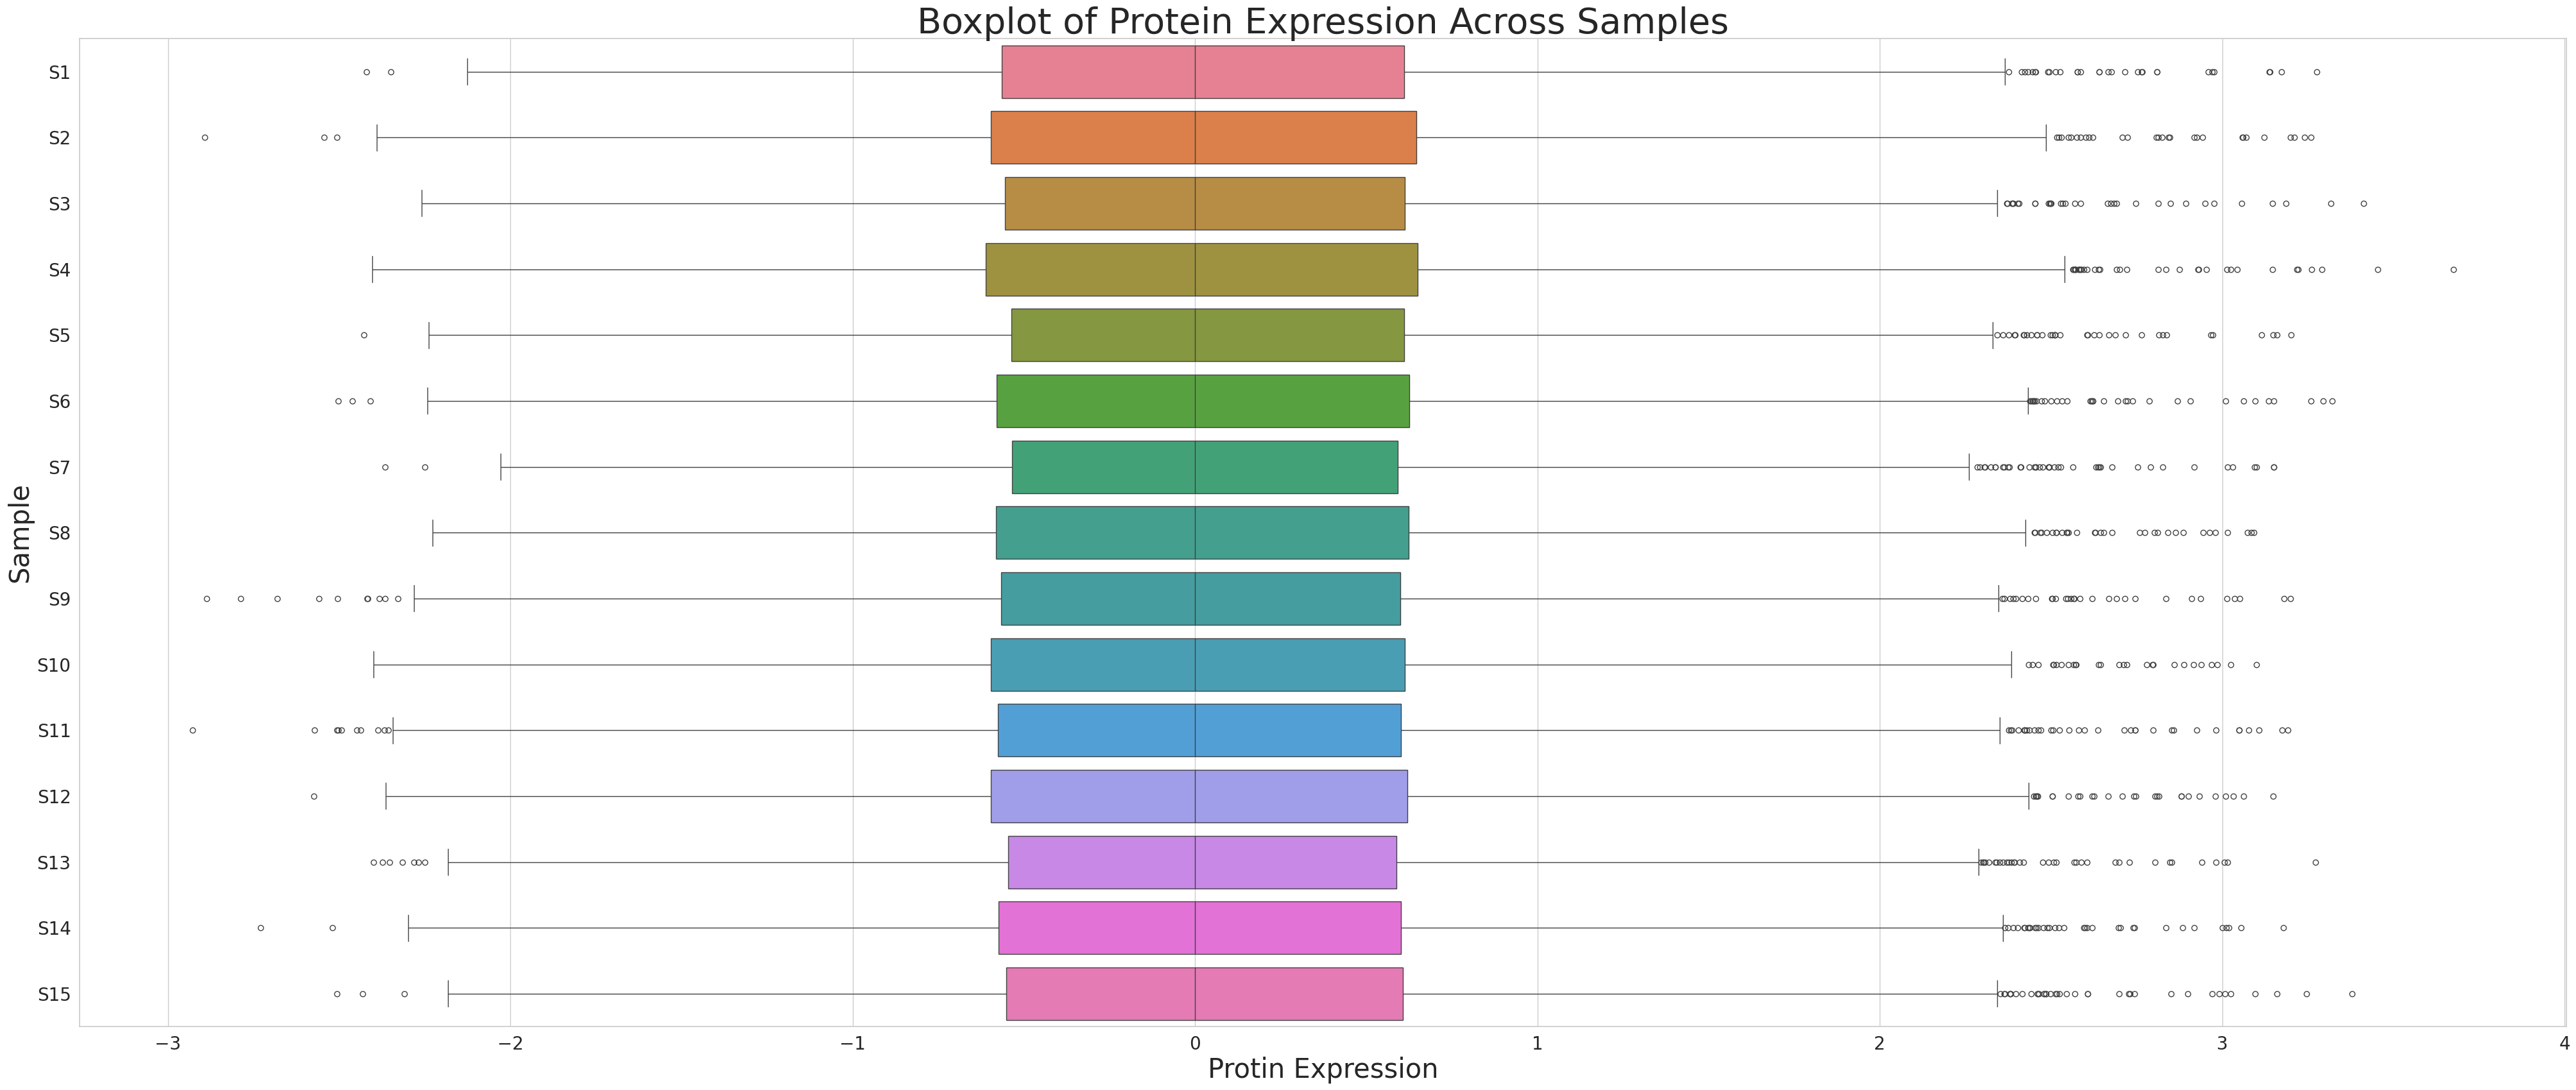

In [ ]:
#samplewise boxplot of protein expression for first 80 samples
plt.figure(figsize=(50, 20))
sns.boxplot(data=input_data.iloc[:, 1:16], orient='h')  # 'h' for horizontal orientation
plt.title('Boxplot of Protein Expression Across Samples',fontsize = 40)
plt.xlabel('Protein Expression', fontsize = 30)
plt.ylabel('Sample',fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

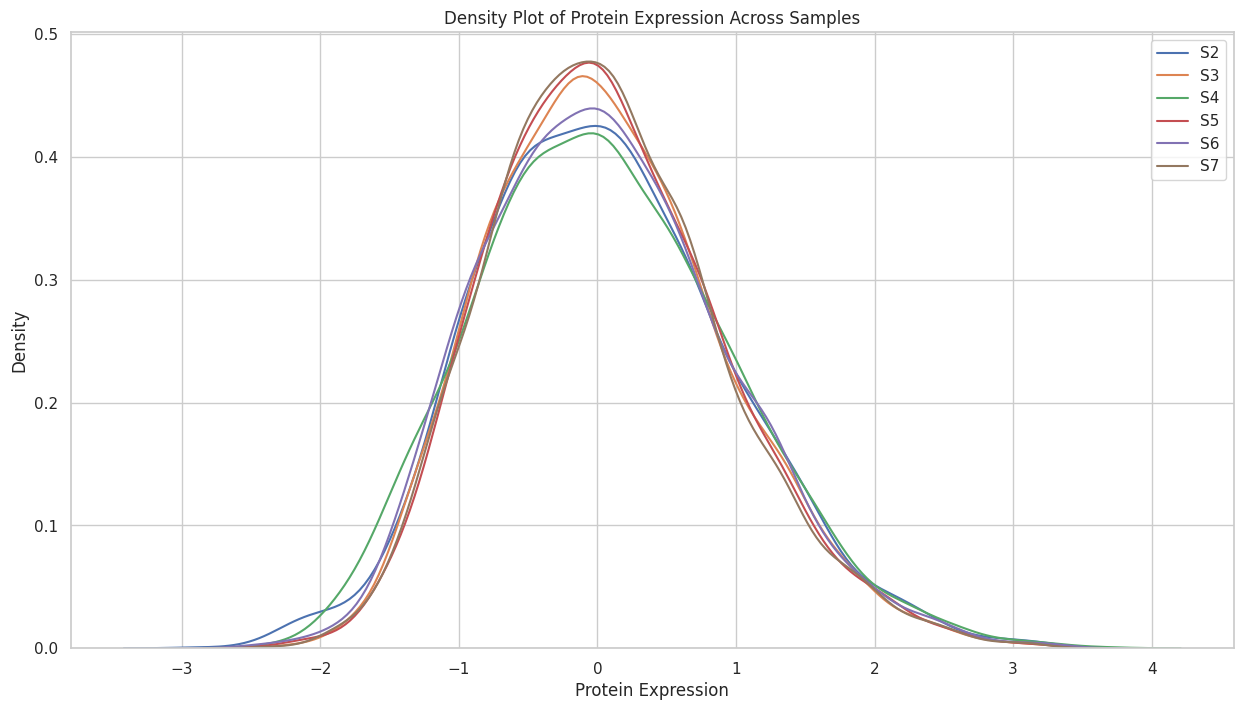

In [ ]:
# Creation of a density plot for each sample
plt.figure(figsize=(15, 8))

# Loopping through each sample and plot the density
for sample_id in input_data.columns[2:8]:
    sns.kdeplot(input_data[sample_id], label=sample_id)

# Setting plot labels and title
plt.title('Density Plot of Protein Expression Across Samples')
plt.xlabel('Protein Expression')
plt.ylabel('Density')
plt.legend()

plt.show()

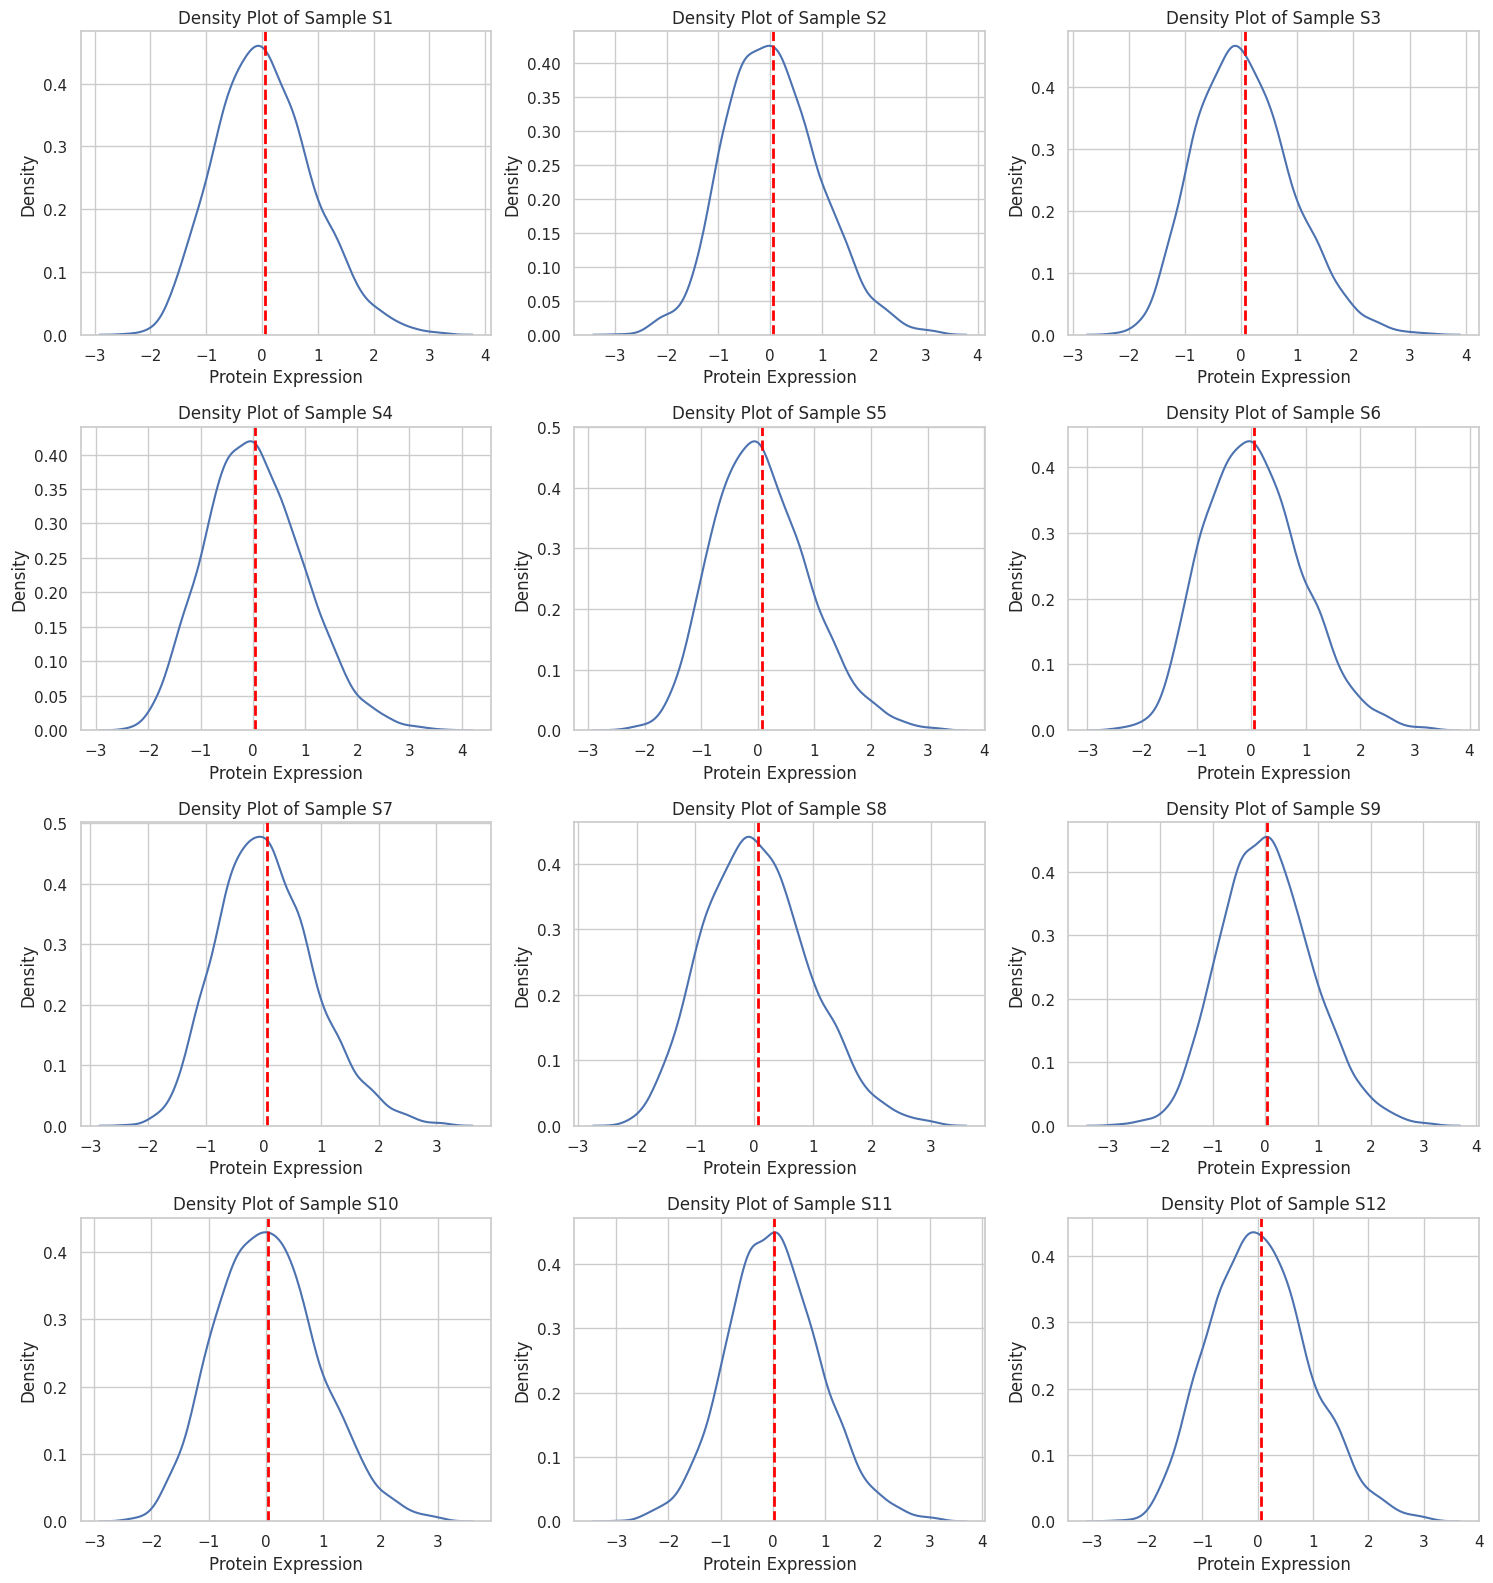

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density_for_samples(sample_ids, data):
    # Calculating the number of rows and columns for subplots
    num_samples = len(sample_ids)
    num_cols = 3
    num_rows = -(-num_samples // num_cols)

    # Creation of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

    # Flattening the 2D array of subplots to simplify indexing
    axes = axes.flatten()

    # Looping through each sample and plot the density
    for i, sample_id in enumerate(sample_ids):
        ax = axes[i]
        sns.kdeplot(data[sample_id], ax=ax)
        ax.axvline(data[sample_id].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
        ax.set_title(f'Density Plot of Sample {sample_id}')
        ax.set_xlabel('Protein Expression')
        ax.set_ylabel('Density')

    # Adjusting layout for better spacing
    plt.tight_layout()
    plt.show()


sample_ids_to_plot = input_data.columns[1:13]
plot_density_for_samples(sample_ids_to_plot, input_data)

In [ ]:
import pandas as pd

def skewness_kurtosis_summary(sample_ids, data, skewness_threshold=0.5):
    summary_data = {'Sample ID': [], 'Skewness': [], 'Kurtosis': [], 'Skewness Category': []}

    for sample_id in sample_ids:
        expression_data = data[sample_id]
        skewness = expression_data.skew()
        kurtosis = expression_data.kurtosis()

        skewness_category = 'Normal' if abs(skewness) <= skewness_threshold else \
                            'Negatively Skewed' if skewness < 0 else 'Positively Skewed'

        summary_data['Sample ID'].append(sample_id)
        summary_data['Skewness'].append(skewness)
        summary_data['Kurtosis'].append(kurtosis)
        summary_data['Skewness Category'].append(skewness_category)

    summary_df = pd.DataFrame(summary_data)
    return summary_df


sample_ids_to_analyze = input_data.columns[2:]  # Replace with your desired sample IDs
skewness_kurtosis_df = pd.DataFrame(skewness_kurtosis_summary(sample_ids_to_analyze, input_data))

print(skewness_kurtosis_df.drop(columns = ['Skewness Category']))

   Sample ID  Skewness  Kurtosis
0         S2  0.299412  0.088891
1         S3  0.420816  0.067134
2         S4  0.342303 -0.011079
3         S5  0.419590  0.127727
4         S6  0.378903  0.032125
5         S7  0.432802  0.171096
6         S8  0.343431 -0.060912
7         S9  0.263933  0.120299
8        S10  0.312462 -0.077939
9        S11  0.210235  0.184850
10       S12  0.327736 -0.088469
11       S13  0.300846  0.108054
12       S14  0.341237  0.005793
13       S15  0.353373  0.122663
14       S16  0.379227 -0.065018


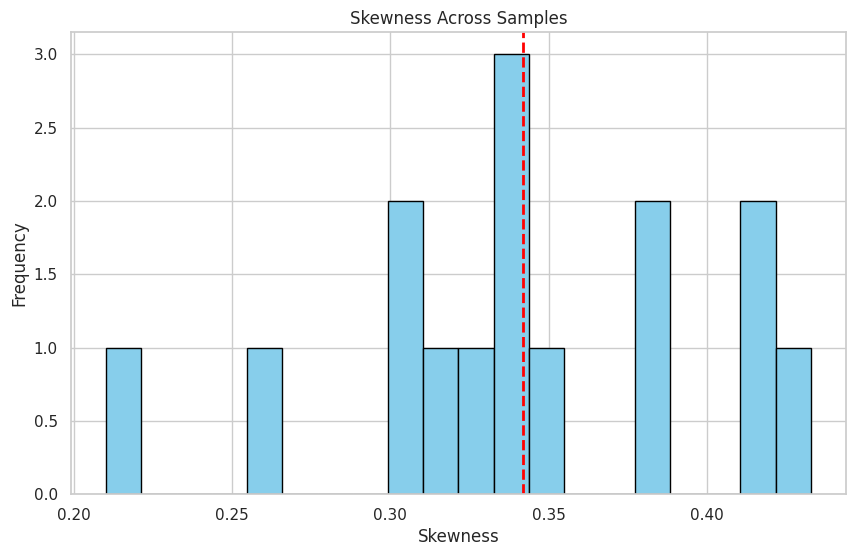

In [ ]:
def plot_skewness_histogram(summary_df):
    plt.figure(figsize=(10, 6))
    plt.hist(summary_df['Skewness'], bins=20, color='skyblue', edgecolor='black')
    plt.axvline(summary_df['Skewness'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.title('Skewness Across Samples')
    plt.xlabel('Skewness')
    plt.ylabel('Frequency')
    plt.show()

plot_skewness_histogram(skewness_kurtosis_df)

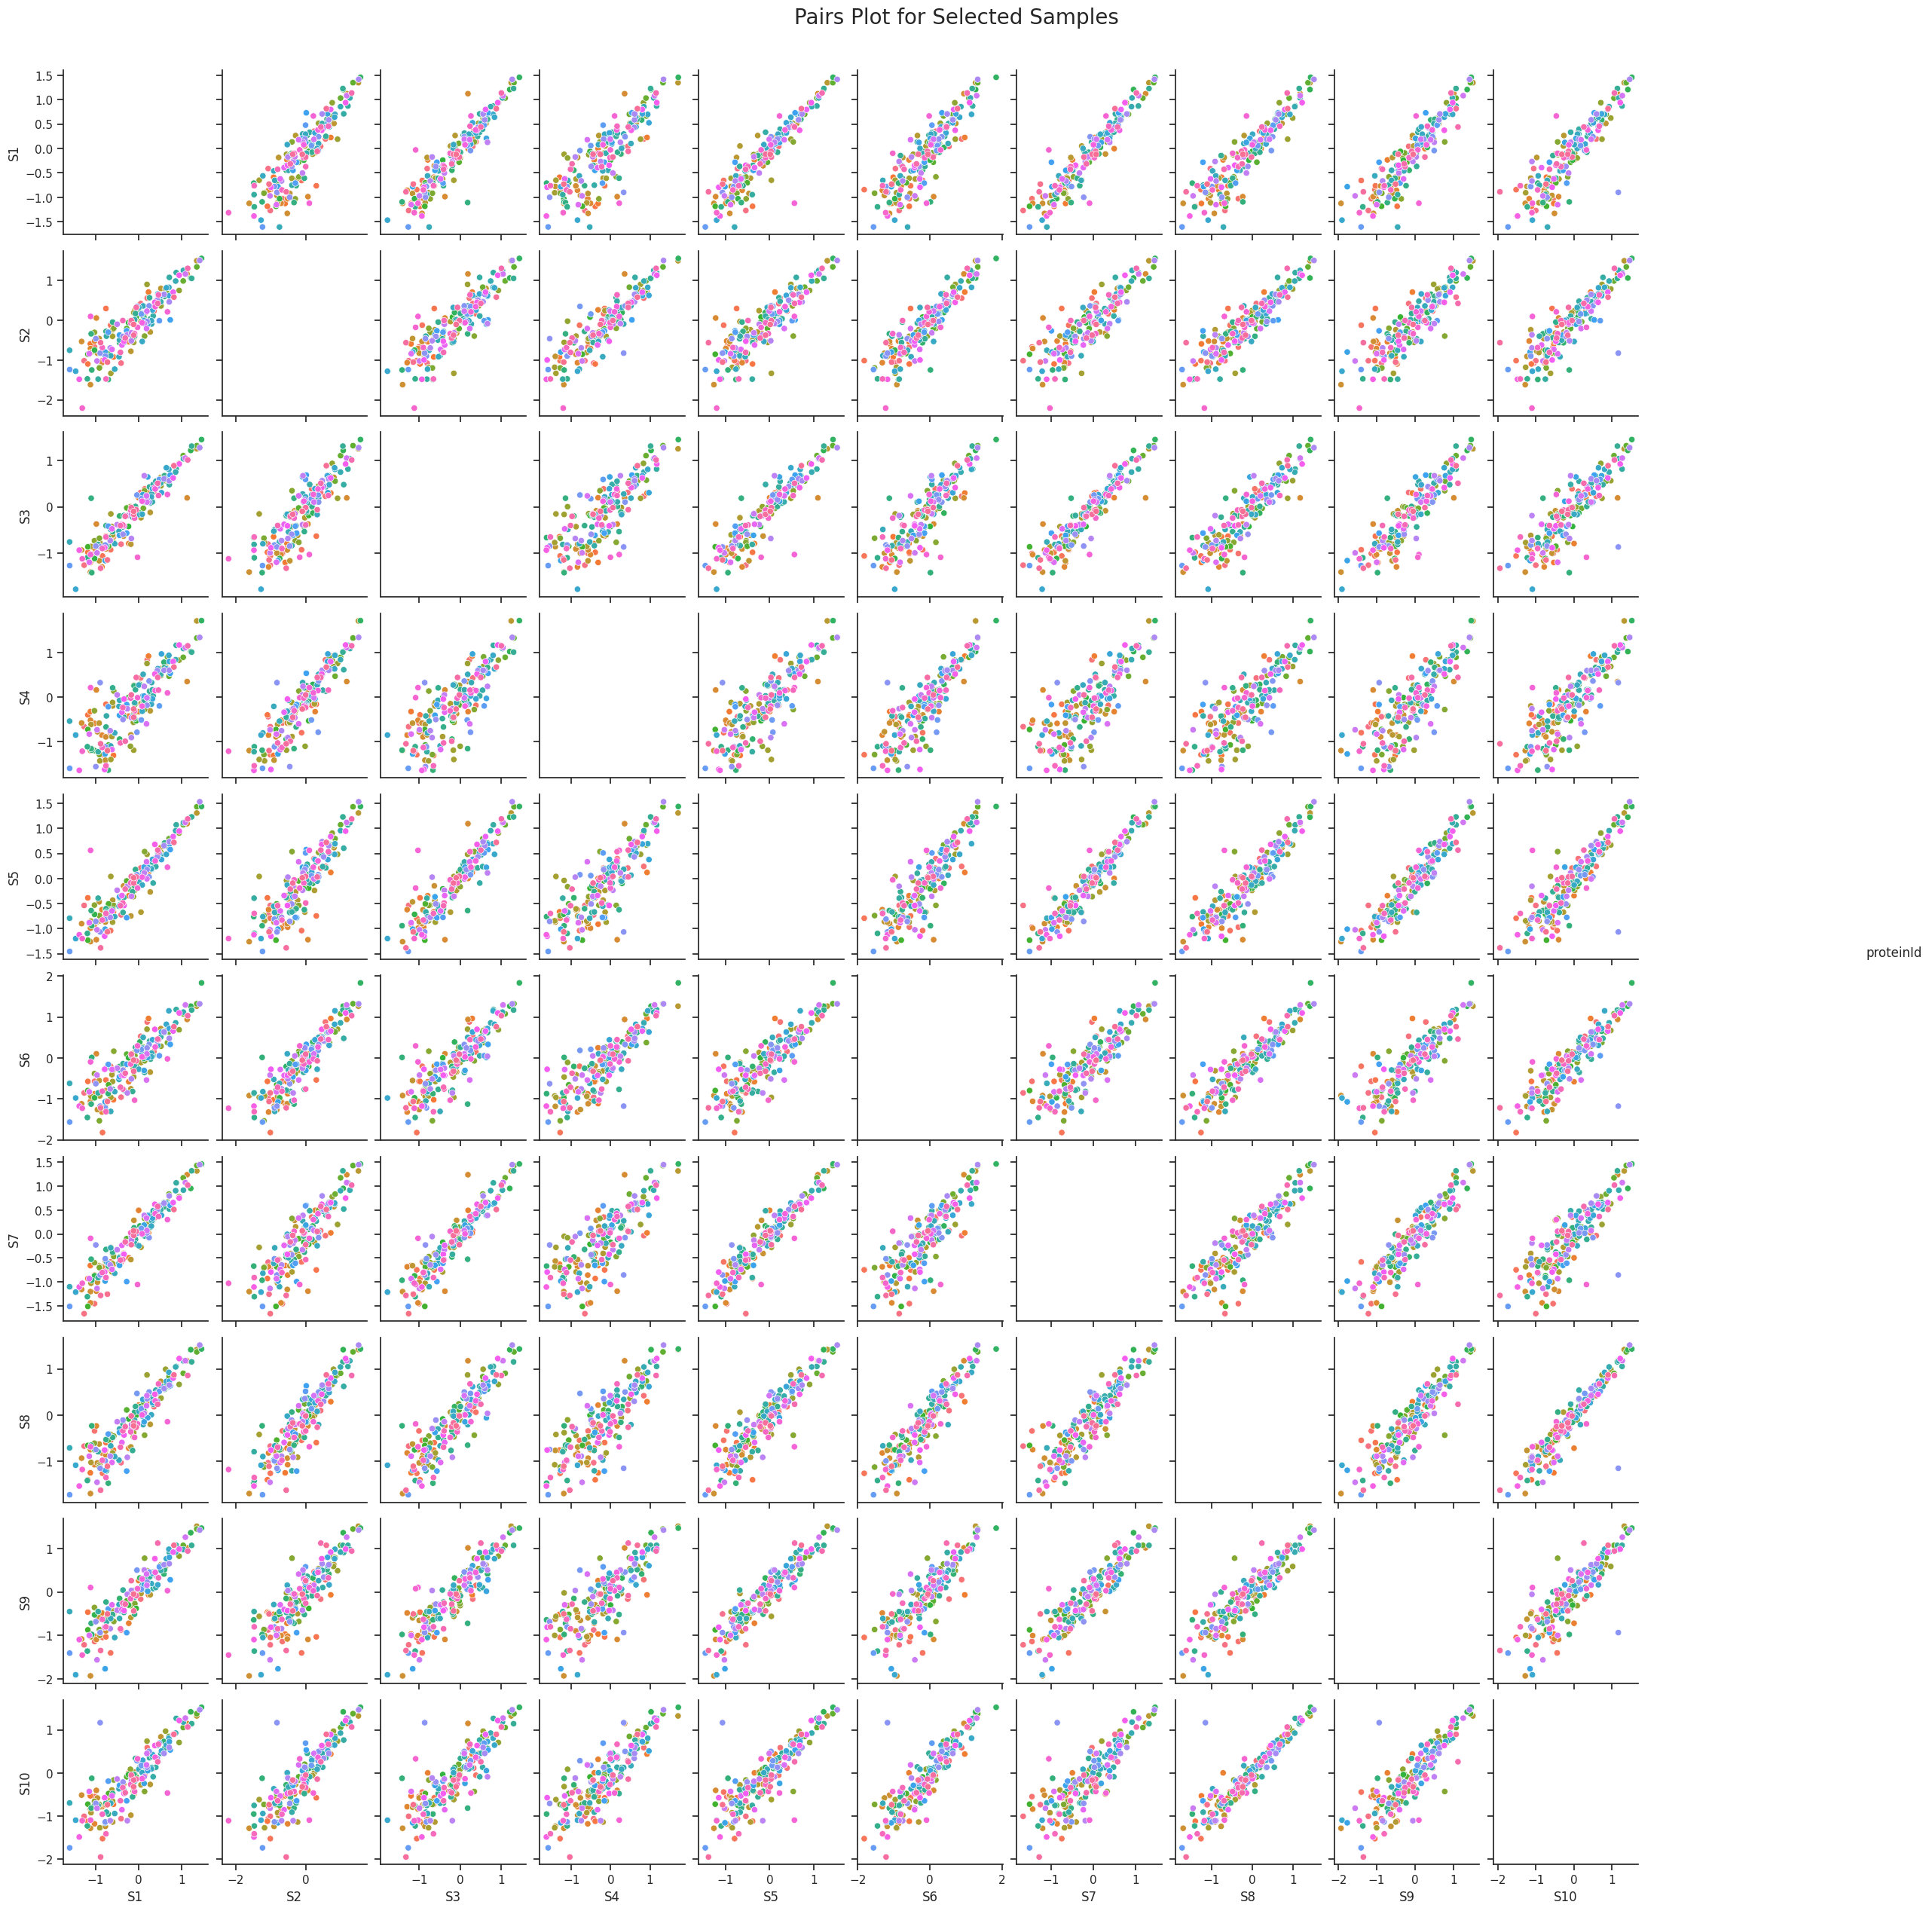

In [ ]:
def plot_pairs_plot(sample_ids, data):
    # Selection of the relevant columns based on the sample IDs
    selected_data = data[['proteinId'] + sample_ids][:180]

    # Creating a pairs plot using Seaborn
    sns.set(style="ticks")
    pairs_plot = sns.pairplot(selected_data, hue='proteinId', palette='husl', height=2.5,plot_kws={'legend': False})

    # Adjusting layout
    pairs_plot.fig.suptitle('Pairs Plot for Selected Samples', y=1.02,fontsize = 20)

    # Adjusting legend size and position
    pairs_plot.fig.subplots_adjust(right=0.85)

    plt.show()


sample_ids_to_plot = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']  # Replace with your desired sample IDs
plot_pairs_plot(sample_ids_to_plot, input_data)

In [ ]:
def pearson_correlation_with_pvalues(data):
    num_samples = data.shape[1]
    corr_matrix = np.zeros((num_samples, num_samples))
    pvalue_matrix = np.zeros((num_samples, num_samples))

    for i in range(num_samples):
        for j in range(num_samples):
            corr, p_value = pearsonr(data.iloc[:, i].astype(float), data.iloc[:, j].astype(float))
            corr_matrix[i, j] = corr
            pvalue_matrix[i, j] = p_value

    corr_df = pd.DataFrame(corr_matrix, index=data.columns, columns=data.columns)
    pvalue_df = pd.DataFrame(pvalue_matrix, index=data.columns, columns=data.columns)

    return corr_df, pvalue_df

scaled_data = input_data.drop(columns = 'proteinId')
pearson_corr, pvalues = pearson_correlation_with_pvalues(scaled_data)

In [ ]:
pearson_corr

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16
S1,1.000000,0.903476,0.948639,0.881142,0.953382,0.904160,0.945951,0.926131,0.933552,0.915250,0.922925,0.923589,0.932527,0.942283,0.952701,0.933302
S2,0.903476,1.000000,0.902065,0.920773,0.909252,0.906320,0.888415,0.922971,0.892611,0.914667,0.893503,0.921056,0.882926,0.912451,0.908610,0.913142
S3,0.948639,0.902065,1.000000,0.881675,0.940720,0.914498,0.948988,0.924942,0.920034,0.914803,0.927537,0.923118,0.940281,0.935380,0.951008,0.928318
S4,0.881142,0.920773,0.881675,1.000000,0.885890,0.902219,0.863432,0.902230,0.866585,0.890705,0.866038,0.893647,0.862504,0.893417,0.893117,0.883124
S5,0.953382,0.909252,0.940720,0.885890,1.000000,0.905326,0.955836,0.928682,0.943260,0.920010,0.923194,0.928559,0.931152,0.936642,0.958562,0.935405
S6,0.904160,0.906320,0.914498,0.902219,0.905326,1.000000,0.889985,0.935213,0.892560,0.933008,0.899402,0.925617,0.886400,0.916537,0.912495,0.915271
S7,0.945951,0.888415,0.948988,0.863432,0.955836,0.889985,1.000000,0.908290,0.926594,0.898433,0.924586,0.906178,0.936547,0.923633,0.951233,0.921389
S8,0.926131,0.922971,0.924942,0.902230,0.928682,0.935213,0.908290,1.000000,0.917371,0.956470,0.906856,0.954946,0.897980,0.952118,0.929180,0.951103
S9,0.933552,0.892611,0.920034,0.866585,0.943260,0.892560,0.926594,0.917371,1.000000,0.908368,0.922106,0.913446,0.926708,0.921624,0.937171,0.923660
S10,0.915250,0.914667,0.914803,0.890705,0.920010,0.933008,0.898433,0.956470,0.908368,1.000000,0.892576,0.954582,0.884827,0.947054,0.921677,0.950405


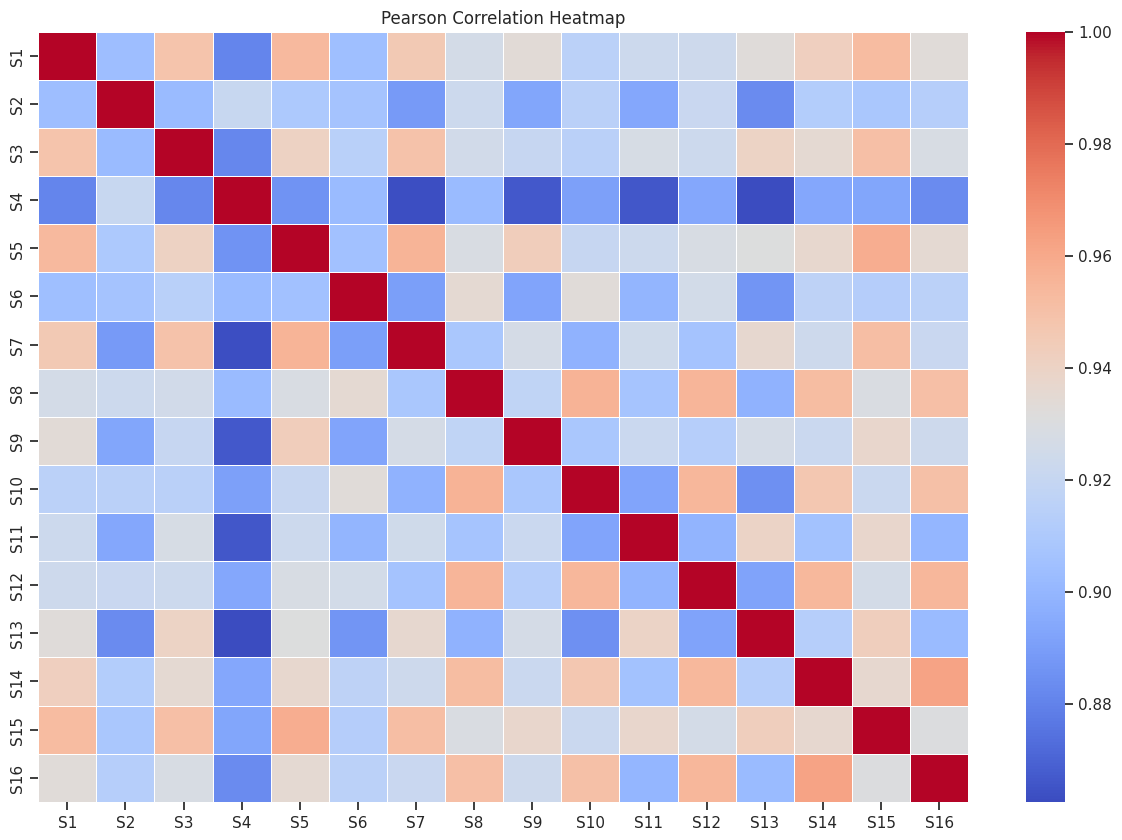

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(pearson_corr.iloc[:250,:250], cmap='coolwarm', annot=False, fmt=".2f",linewidth= 0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [ ]:
def median_normalization(log_transformed_data, sample_ids):
    normalized_data = log_transformed_data.copy()

    for sample_id in sample_ids:
        # Subtracting the median value of each sample from every data point to eliminate the overall shift in distribution
        normalized_data[sample_id] = log_transformed_data[sample_id] - log_transformed_data[sample_id].median()

    return normalized_data

normalized_data = median_normalization(scaled_data, scaled_data.columns)
normalized_data

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16
1,-0.411012,-1.076158,-0.806997,-0.434803,-0.725628,-0.959516,-0.586721,-1.025746,-0.874256,-1.056795,-0.986267,-1.03551,-0.740411,-0.913275,-0.755141,-1.389646
2,-1.269267,-1.015904,-1.260983,-0.659232,-0.53701,-0.854457,-1.66144,-0.667796,-1.216187,-1.002023,-1.361061,-1.080648,-1.488528,-0.885855,-0.670009,-0.762212
3,0.044692,0.417392,0.30851,0.434862,0.20937,0.528019,0.070742,0.101099,-0.164252,0.284962,0.334462,0.018326,0.220509,0.164772,0.161786,0.069544
4,0.353692,0.228891,0.333696,0.166018,0.396403,0.158838,0.325155,0.184229,0.461648,0.115881,0.198846,0.212801,0.324418,0.067029,0.397094,0.186707
5,0.195878,0.552835,0.227279,0.843265,0.241776,0.877353,-0.033003,0.422753,0.283605,0.588093,0.283465,0.466227,0.16698,0.370432,0.344009,0.31273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,-0.27421,-2.506543,-0.288312,-1.867858,-0.514042,-0.630767,-0.520717,-0.881596,-0.460478,-1.878792,-0.692295,-0.966475,-0.529827,-1.094388,-0.662719,-0.031419
3855,-0.104406,-0.999071,-0.239878,-0.304659,0.197549,-0.53641,-0.01791,0.107508,-0.469134,0.10922,-1.07137,-0.201753,-0.27852,0.070125,-0.034177,0.099359
3856,-1.136882,-0.907452,-0.319586,-0.639456,-0.641859,-1.049309,-0.597986,-1.617188,-0.872372,-1.367203,-0.673312,-1.054317,-0.153492,-0.930984,-0.666812,-1.025911
3857,0.547603,0.593893,0.427897,0.373606,0.746787,0.288633,0.6231,0.566584,0.812628,0.753414,0.307292,0.699024,0.512521,0.603303,0.606839,0.730946


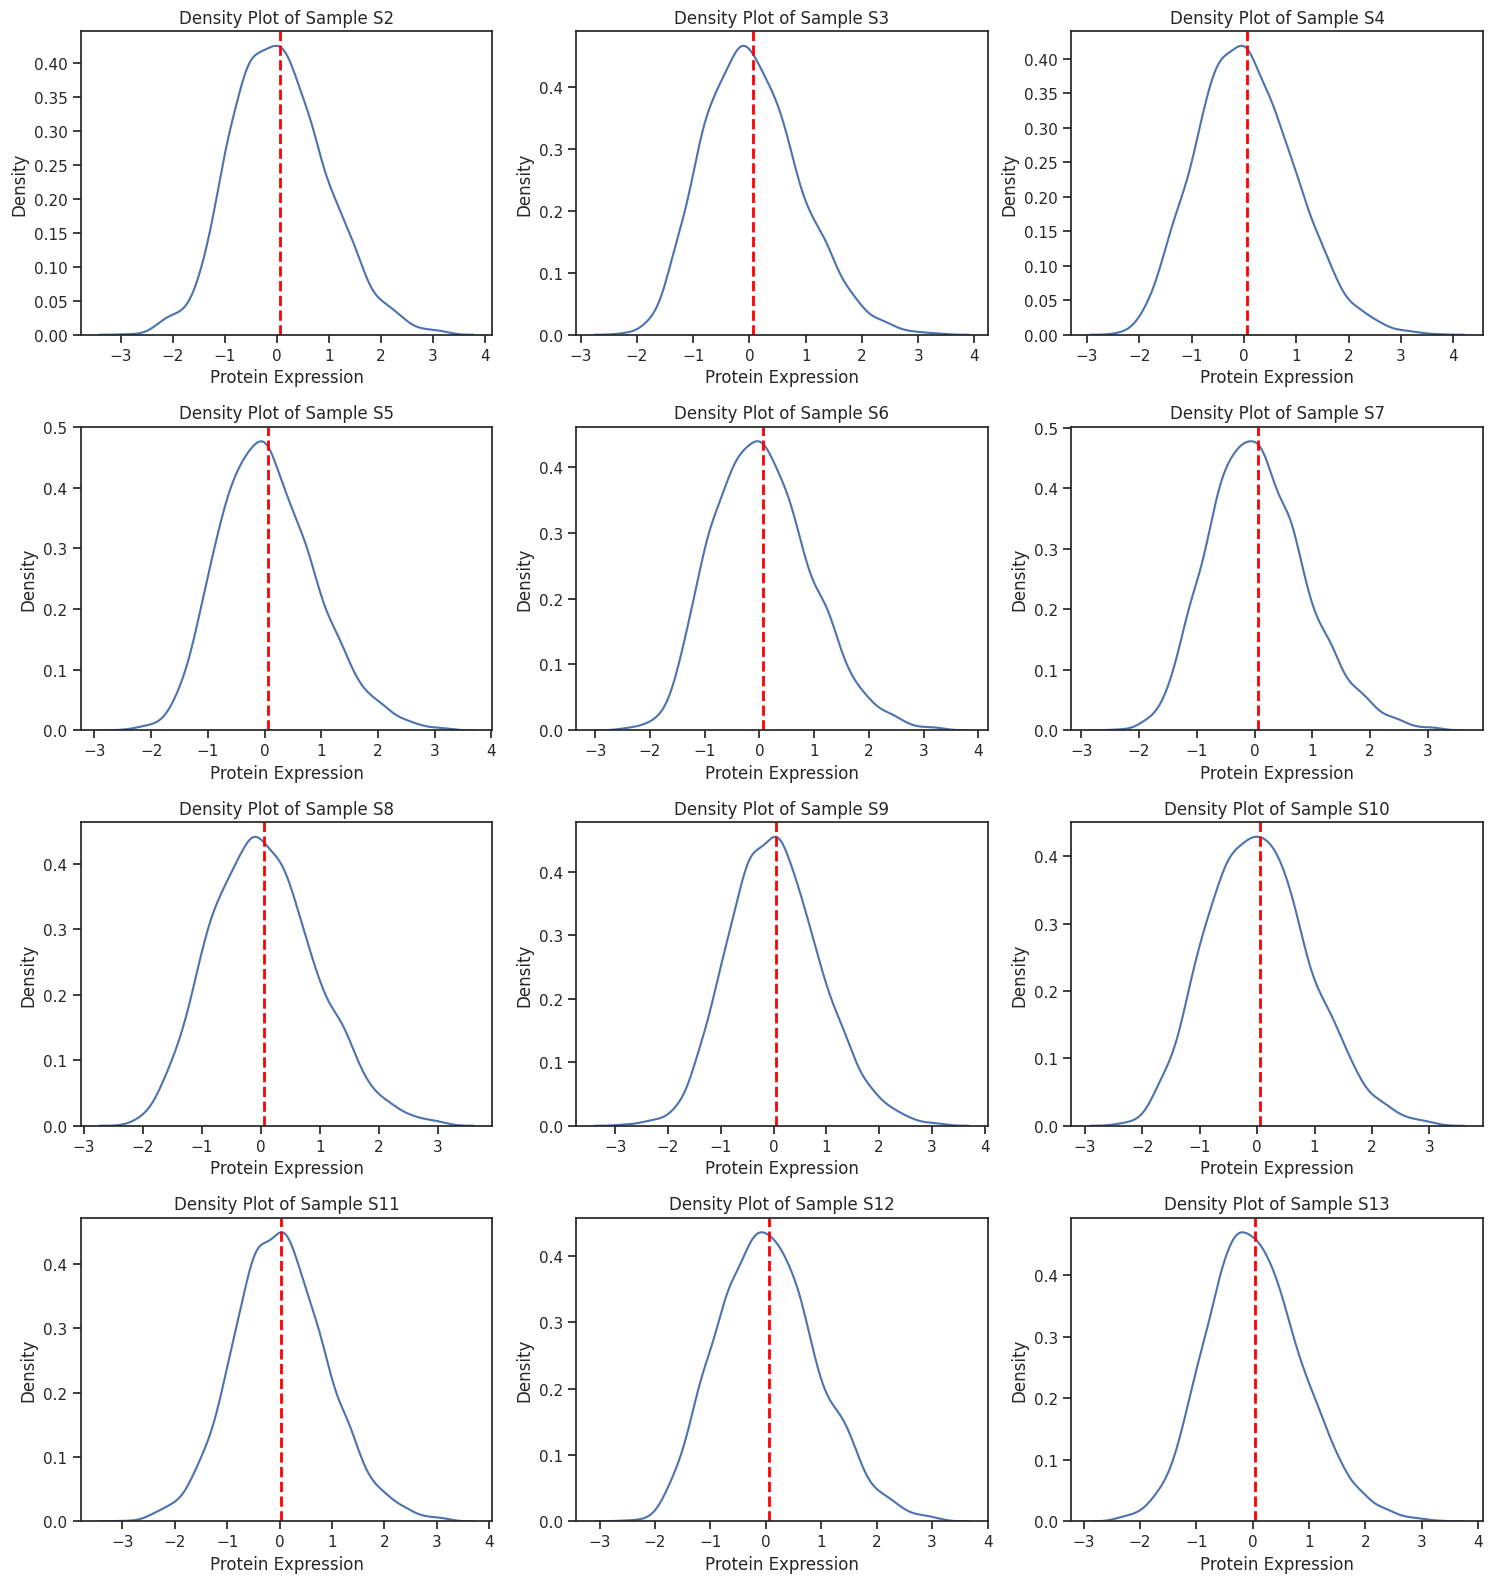

In [ ]:
sample_ids_to_plot = scaled_data.columns[1:13]
plot_density_for_samples(sample_ids_to_plot, scaled_data)
sns.set_style('whitegrid')

In [ ]:
scaled_data['proteinId'] = input_data['proteinId']
scaled_data

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,proteinId
1,-0.411015,-1.076159,-0.806997,-0.434803,-0.725628,-0.959516,-0.586721,-1.025746,-0.874256,-1.056795,-0.986267,-1.03551,-0.740411,-0.913275,-0.755143,-1.389646,A0A0C4DH25
2,-1.269271,-1.015904,-1.260983,-0.659232,-0.53701,-0.854457,-1.66144,-0.667796,-1.216187,-1.002024,-1.361061,-1.080648,-1.488528,-0.885855,-0.67001,-0.762212,A0A0U1RRL7
3,0.044688,0.417392,0.30851,0.434862,0.20937,0.528019,0.070741,0.101099,-0.164252,0.284961,0.334462,0.018326,0.220509,0.164772,0.161785,0.069544,A0AVT1
4,0.353688,0.22889,0.333696,0.166018,0.396403,0.158838,0.325155,0.184229,0.461648,0.115881,0.198846,0.212801,0.324418,0.067029,0.397093,0.186706,A0FGR8
5,0.195875,0.552835,0.227279,0.843265,0.241776,0.877353,-0.033004,0.422753,0.283605,0.588093,0.283465,0.466227,0.16698,0.370432,0.344008,0.31273,A0MZ66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,-0.274214,-2.506544,-0.288312,-1.867858,-0.514042,-0.630767,-0.520717,-0.881596,-0.460478,-1.878792,-0.692295,-0.966475,-0.529827,-1.094388,-0.662721,-0.031419,Q9Y6R7
3855,-0.10441,-0.999072,-0.239878,-0.304659,0.197549,-0.53641,-0.017911,0.107508,-0.469134,0.109219,-1.07137,-0.201753,-0.27852,0.070125,-0.034178,0.099358,Q9Y6T7
3856,-1.136885,-0.907452,-0.319586,-0.639456,-0.641859,-1.049309,-0.597986,-1.617188,-0.872372,-1.367204,-0.673312,-1.054317,-0.153492,-0.930984,-0.666813,-1.025912,Q9Y6U3
3857,0.5476,0.593893,0.427897,0.373606,0.746787,0.288633,0.623099,0.566584,0.812627,0.753414,0.307292,0.699024,0.512521,0.603303,0.606838,0.730945,Q9Y6V0


In [ ]:
def perform_protein_pca(scaled_data, n_components=5):
    # Transpose the DataFrame so that each row is a gene
    transposed_data = scaled_data.set_index('proteinId').T

    pca_list = []
    feature_weight_list = []

    for n in range(1, n_components + 1):
        PCAmod = PCA(n_components=n)
        PCAmod.fit(transposed_data)

        pca_list.append(pd.Series({
            'n': n,
            'model': PCAmod,
            'var': PCAmod.explained_variance_ratio_.sum()
        }))

        weights = PCAmod.explained_variance_ratio_.reshape(-1, 1) / PCAmod.explained_variance_ratio_.sum()
        overall_contributions = np.abs(PCAmod.components_) * weights
        abs_feature_values = overall_contributions.sum(axis=0)
        feature_weight_list.append(pd.DataFrame({
            'n': n,
            'features': transposed_data.columns,
            'values': abs_feature_values / abs_feature_values.sum(),
        }))

    pca_report = pd.concat(pca_list, axis=1).T.set_index('n')
    feature_importance_report = pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values')

    return pca_report, feature_importance_report

# Example usage:
n_components = 16  # You can adjust the number of components as needed
protein_pca_report, protein_feature_importance_report = perform_protein_pca(scaled_data, n_components)

In [ ]:
protein_pca_report

,model,var
n,,
1,PCA(n_components=1),0.236127
2,PCA(n_components=2),0.384925
3,PCA(n_components=3),0.474918
4,PCA(n_components=4),0.552587
5,PCA(n_components=5),0.619094
6,PCA(n_components=6),0.677912
7,PCA(n_components=7),0.725069
8,PCA(n_components=8),0.767647
9,PCA(n_components=9),0.806674


In [ ]:
protein_feature_importance_report

features,A0A0C4DH25,A0A0U1RRL7,A0AVT1,A0FGR8,A0MZ66,A1A5C7,A1L0T0,A2RTX5,A3KMH1,A4D1P6,...,Q9Y6M9,Q9Y6N5,Q9Y6N8,Q9Y6R0,Q9Y6R1,Q9Y6R7,Q9Y6T7,Q9Y6U3,Q9Y6V0,Q9Y6X4
n,,,,,,,,,,,,,,,,,,,,,
1,0.000261,0.000563,0.000202,0.000240,0.000596,0.001029,0.000266,0.000480,0.000607,0.001004,...,0.000257,0.000443,0.000195,0.000073,0.000035,0.001324,3.763887e-07,0.000655,0.000017,0.000096
2,0.000347,0.000366,0.000266,0.000169,0.000458,0.000791,0.000192,0.000305,0.000433,0.000709,...,0.000198,0.000344,0.000460,0.000235,0.000081,0.001169,3.154541e-04,0.000667,0.000144,0.000104
3,0.000348,0.000345,0.000285,0.000167,0.000438,0.000663,0.000164,0.000356,0.000483,0.000772,...,0.000226,0.000316,0.000531,0.000249,0.000079,0.001018,4.034103e-04,0.000567,0.000201,0.000177
4,0.000387,0.000327,0.000277,0.000149,0.000395,0.000590,0.000146,0.000320,0.000467,0.000721,...,0.000223,0.000289,0.000511,0.000228,0.000110,0.001030,4.925104e-04,0.000535,0.000213,0.000240
5,0.000376,0.000340,0.000286,0.000149,0.000381,0.000534,0.000166,0.000401,0.000449,0.000709,...,0.000209,0.000278,0.000494,0.000234,0.000111,0.000999,4.855668e-04,0.000507,0.000212,0.000249
6,0.000347,0.000323,0.000268,0.000160,0.000359,0.000496,0.000175,0.000388,0.000414,0.000727,...,0.000202,0.000266,0.000538,0.000217,0.000111,0.000919,4.632981e-04,0.000493,0.000210,0.000231
7,0.000336,0.000336,0.000251,0.000152,0.000340,0.000478,0.000172,0.000377,0.000406,0.000783,...,0.000222,0.000252,0.000508,0.000209,0.000106,0.000874,4.476044e-04,0.000498,0.000197,0.000258
8,0.000339,0.000321,0.000245,0.000144,0.000327,0.000472,0.000166,0.000365,0.000387,0.000757,...,0.000214,0.000262,0.000487,0.000207,0.000110,0.000882,4.553215e-04,0.000515,0.000204,0.000257
9,0.000345,0.000324,0.000235,0.000145,0.000318,0.000453,0.000171,0.000363,0.000381,0.000723,...,0.000210,0.000251,0.000468,0.000199,0.000111,0.000903,4.626793e-04,0.000515,0.000202,0.000251


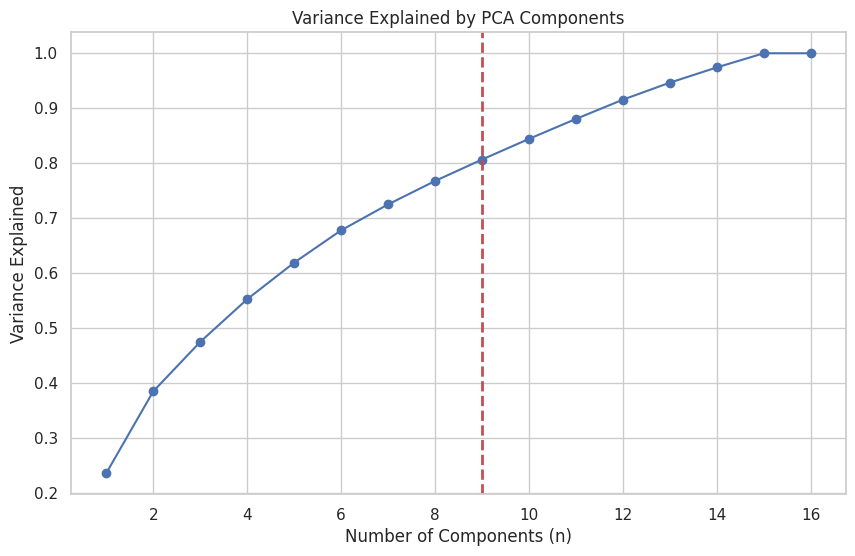

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(protein_pca_report.index, protein_pca_report['var'], marker='o', linestyle='-', color='b')
plt.title('Variance Explained by PCA Components')
plt.axvline(x=9, color='r', linestyle='--', linewidth=2, label='Threshold at x=50')
plt.xlabel('Number of Components (n)')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

[Text(0.5, 0, 'Number of components'),
 Text(0, 0.5, 'Relative Importance'),
 Text(0.5, 1.0, 'Feature Importance Vs Dimensions')]

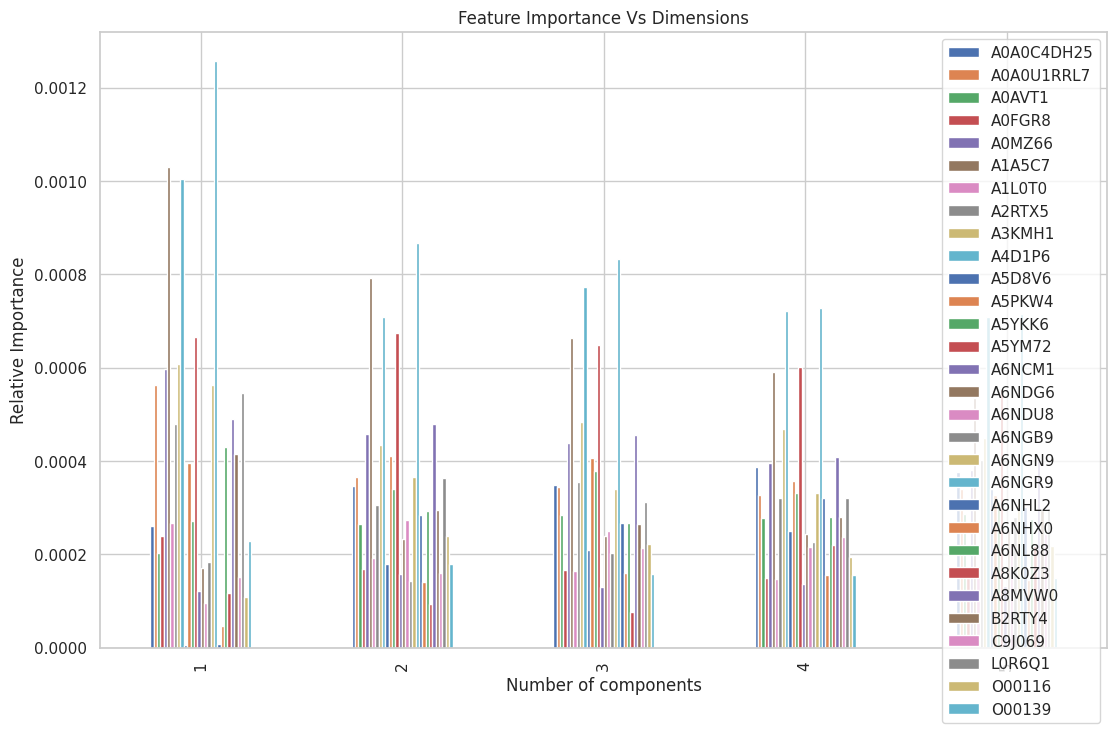

In [ ]:
ax = protein_feature_importance_report .iloc[:5,:30].plot(kind = 'bar' , figsize = (13,8))
ax.legend(loc = 'upper right')
ax.set(xlabel = 'Number of components' ,  ylabel = 'Relative Importance' , title = 'Feature Importance Vs Dimensions')

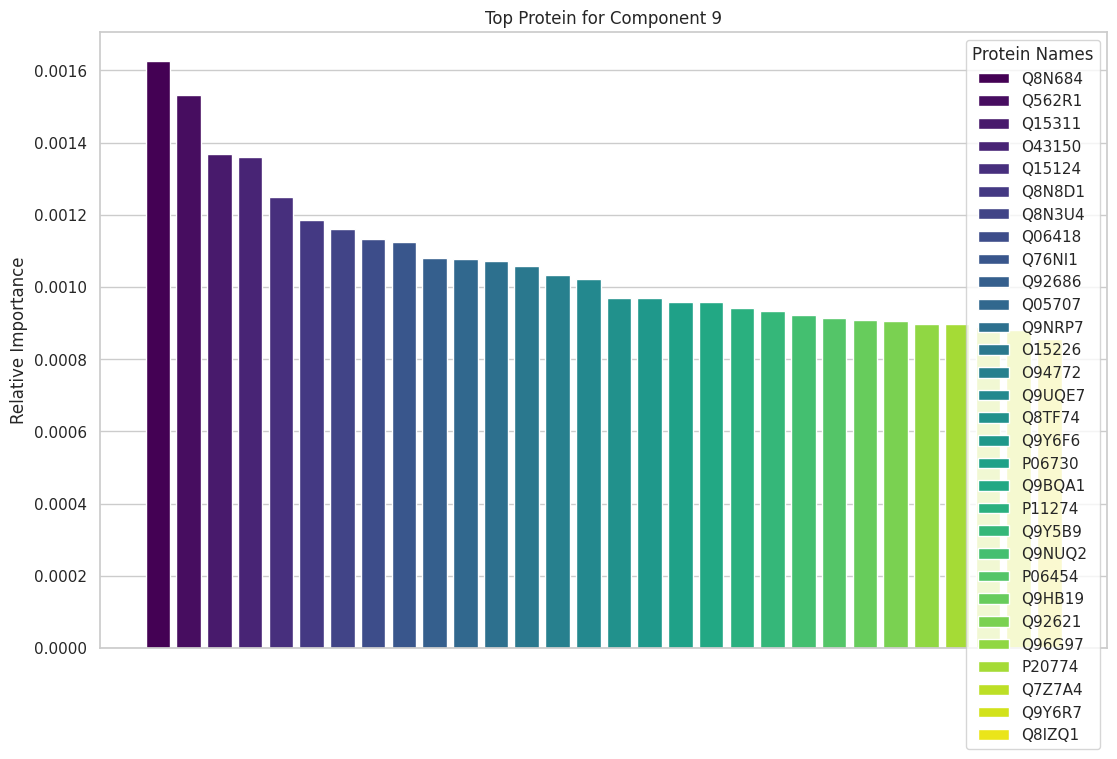

In [ ]:

n_top_proteins = 30  # Number of top proteinss to display

# Get the top genes for the 20th component
top_protein_9th_component = protein_feature_importance_report.iloc[9].nlargest(n_top_proteins)

# Plot the top genes for the 150th component
fig, ax = plt.subplots(figsize=(13, 8))

# Plot each bar with a unique color
for idx, (protein, importance) in enumerate(top_protein_9th_component.items()):
    ax.bar(idx, importance, label=protein, color=plt.cm.viridis(idx / len(top_protein_9th_component)))

# Remove x-axis ticks
ax.set_xticks([])

# Display legend with protein names
ax.legend(loc='upper right', title='Protein Names')

ax.set(ylabel='Relative Importance', title='Top Protein for Component 9 (80% Variance Capture)')
plt.show()

In [ ]:
sample_groups = orignal_data.iloc[0,1:]
group_1 = sample_groups[sample_groups == 'Control'].index.values
group_2 = sample_groups[sample_groups == 'Disease'].index.values


print("Group Control:", group_1)
print("Group Disease:", group_2)

Group Control: ['S2' 'S4' 'S6' 'S8' 'S10' 'S12' 'S14' 'S16']
Group Disease: ['S1' 'S3' 'S5' 'S7' 'S9' 'S11' 'S13' 'S15']


In [ ]:
def get_protein_stats_for_all_proteins(group_1, group_2, expression_data):
    protein_stats_list = []

    for protein_name in expression_data['proteinId']:
        # Find the index of the protein
        protein_index = expression_data[expression_data['proteinId'] == protein_name].index[0]

        # Extract expression values for the protein and groups
        protein_values_group_1 = expression_data.loc[protein_index, group_1].values.astype(float)
        protein_values_group_2 = expression_data.loc[protein_index, group_2].values.astype(float)

        # Perform t-test
        t_stat, p_value = ttest_ind(protein_values_group_1, protein_values_group_2)

        # Create a data frame with protein expression values
        protein_data = {
            'ProteinName': protein_name,
            'SampleID': [protein_name] * (len(group_1) + len(group_2)),
            'Expression': list(protein_values_group_1) + list(protein_values_group_2)
        }

        protein_df = pd.DataFrame(protein_data)

        # Append protein stats to the list
        protein_stats_list.append({'ProteinName': protein_name, 'TStatistic': t_stat, 'PValue': p_value})

    # Create a data frame with protein statistics
    protein_stats_df = pd.DataFrame(protein_stats_list)

    return protein_stats_df


protein_stats_df = get_protein_stats_for_all_proteins(group_1, group_2, scaled_data)

print('Protein Statistics Dataframe:')
print(protein_stats_df.head())

Protein Statistics Dataframe:
  ProteinName  TStatistic    PValue
0  A0A0C4DH25   -2.233565  0.042345
1  A0A0U1RRL7    2.139752  0.050471
2      A0AVT1    1.174614  0.259742
3      A0FGR8   -5.593321  0.000066
4      A0MZ66    4.042067  0.001212


In [ ]:
# Calculate mean expression for each group
mean_expression_group1 = scaled_data[group_1].mean(axis=1)
mean_expression_group2 = scaled_data[group_2].mean(axis=1)

# Calculate fold change
fold_change = mean_expression_group2 / mean_expression_group1

# Add fold change to the DataFrame
scaled_data['FoldChange'] = fold_change
scaled_data['PValue'] = protein_stats_df['PValue']
scaled_data['TStatistic'] = protein_stats_df['TStatistic']

# Display the DataFrame with fold change
print(scaled_data[['proteinId', 'FoldChange','PValue','TStatistic']])


       proteinId  FoldChange    PValue  TStatistic
1     A0A0C4DH25    0.745926  0.050471    2.139752
2     A0A0U1RRL7    1.366096  0.259742    1.174614
3         A0AVT1    0.587334  0.000066   -5.593321
4         A0FGR8    2.113723  0.001212    4.042067
5         A0MZ66    0.385680  0.000008    6.832772
...          ...         ...       ...         ...
3854      Q9Y6R7    0.399946  0.821051    0.230483
3855      Q9Y6T7    1.218743  0.010849   -2.935701
3856      Q9Y6U3    0.589201  0.970682    0.037416
3857      Q9Y6V0    0.994633  0.639082    0.479364
3858      Q9Y6X4    1.125423       NaN         NaN

[3858 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


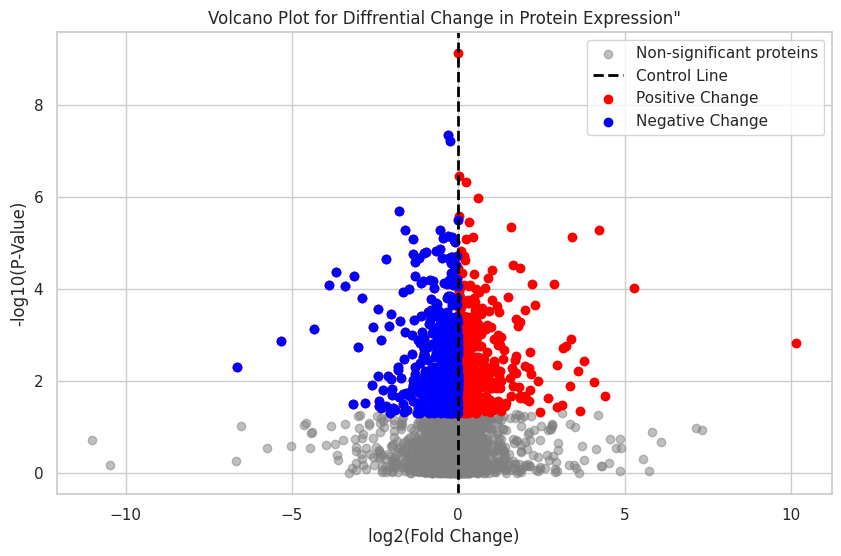

In [ ]:
# Create a volcano plot
plt.figure(figsize=(10, 6))

# Scatter plot with log2(FoldChange)
plt.scatter(np.log2(scaled_data['FoldChange']), -np.log10(scaled_data['PValue']), color='grey', alpha=0.5)

# Highlight significant genes (optional)
significance_threshold = -np.log10(0.05)
significant_genes = scaled_data[scaled_data['PValue'] < 0.05]
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Control Line')
plt.scatter(np.log2(significant_genes['FoldChange']), -np.log10(significant_genes['PValue']), color='red', label='Positive Fold Change')

# Scatter plot for negative fold change
plt.scatter(np.log2(significant_genes[significant_genes['FoldChange'] < 1]['FoldChange']),
            -np.log10(significant_genes[significant_genes['FoldChange'] < 1]['PValue']),
            color='blue', label='Negative Fold Change')

# Set plot labels and title
plt.title('Volcano Plot for Diffrential Change in Protein Expression"')
plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(P-Value)')

# Add a legend with customized labels
plt.legend(labels={'Non-significant proteins' : 'Non significant proteins', 'Control Line': 'Control Line','Positive Change': 'Positive','Negative Change': 'Negative'})

# Show the plot
plt.show()

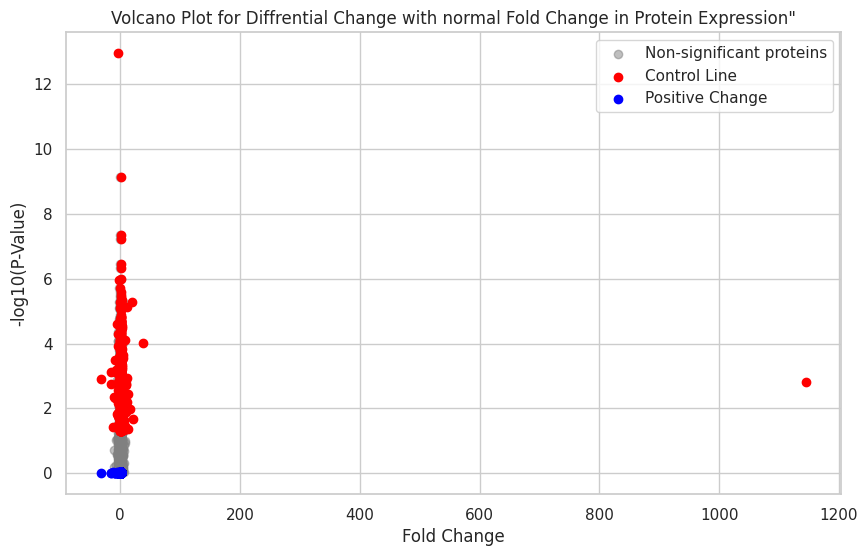

In [ ]:
# Create a volcano plot
plt.figure(figsize=(10, 6))

# Scatter plot with log2(FoldChange)
plt.scatter(np.log2(scaled_data['FoldChange']), -np.log10(scaled_data['PValue']), color='grey', alpha=0.5)

# Highlight significant genes (optional)
significance_threshold = -np.log10(0.05)
significant_genes = scaled_data[scaled_data['PValue'] < 0.05]
# plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Control Line')
plt.scatter(significant_genes['FoldChange'], -np.log10(significant_genes['PValue']), color='red', label='Positive Fold Change')

# Scatter plot for negative fold change
plt.scatter(significant_genes[significant_genes['FoldChange'] < 1]['FoldChange'],
            significant_genes[significant_genes['FoldChange'] < 1]['PValue'],
            color='blue', label='Negative Fold Change')

# Set plot labels and title
plt.title('Volcano Plot for Diffrential Change with normal Fold Change in Protein Expression"')
plt.xlabel('Fold Change')
plt.ylabel('-log10(P-Value)')

# Add a legend with customized labels
plt.legend(labels={'Non-significant proteins' : 'Non significant proteins', 'Control Line': 'Control Line','Positive Change': 'Positive','Negative Change': 'Negative'})

# Show the plot
plt.show()